# CURRENT STATE

**TO DO**

- Feature Engineering

    - Apply the one hot encode techniques to process my columns. DONE
    - Reduce the number of columns that I have using Feature Selection Techniques.


- Apply the scikit learn and NN.
    - Apply PCA to see how perform before my models
    - Logistic Regression
    - Support Vector Machine
    - Random forest
    - Bagging
    - Boosting
    - Neural Networks
    
    Have in mind parameter optimization

- Prepare the next Pop meeting (presentation).


# Predicting hospital admission at emergency department triage

**Main statement**
Using machine learning, how might we predict the patient admission into the hospital in the emergency department to provide better information that helps the different stakeholders make better decisions.


## Introduction

Emergency departments (ED) are the hospitals' areas where it is provided treatment for patients with severe illnesses and life-threatening injuries 24 hours a day, 365 days a year. Patients of all ages and a nearly infinite variety of conditions and degrees of illness can require attention in emergency rooms and the approach to treatment in an emergency department can vary dramatically from case to case, even for the same medical condition. Emergency departments are places with high-level pressure and are fast-paced. EDs often become overcrowded due to the variety of complaints and injuries they have to deal with, which can be quite complex. Despite the fact that the majority of patients are discharged from the emergency department, it usually is the primary source of hospital admissions.

Triage is one of the most common tools used to improve ED operational performance. It is utilized to sort incoming patients into groups according to their urgency level. There are several tools/scales developed in order to assist the health provider to categorize the patient. Typically, a nurse does the first evaluation based on various factors, including demographics, chief complaints, and vital signs, in order to carry out triage. Once is triaged, the patient is examined by a physician, who evaluates the patient disposition: admitted or discharged. However, the described process tends to highly depend on the medical provider’s knowledge and experience. 

Advantages of optimizing the process of triage and admission of a patient in the emergency department:

- Patients: better opportunity, safety and satisfaction. Reduce complications, adverse events, patient morbidity and mortality.
- Healthcare providers: support in decision making and not only to emergency professionals, prediction could help primary health services to define if the patient needs to consult the emergency room.
- Hospitals management: support decision-making regarding resources management, patient flow, and healthcare spending. Improve indicators like stay length, readmission rates, and support protocol definitions. 

With hospitals increasing adoption of electronic health records and data warehousing, it has been easier to apply statistical models to improve healthcare processes. Many groups have done predictive models to apply to admission disposition in emergency departments.

Selection of variables
- Based on a review of the literature
- Expert consensus 
- Expected relevance and availability
- Related only to the current attention vs including information about past events and medical history

Statistical models
- Classical statistical multivariable logistic regression.
- Naive Bayes.
- Random forest.
- Gradient boosted decision trees (XGBoost) model. 
- Deep neural network.
- Support vector machines. 
- Cox proportional hazards (CPH) model. 
- Tabu Search (TS).
- T-ADAB integrates Adaboost. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
from scipy import stats

**Declaration of Use of another Machine Learning Project's Data**

The dataset used in this project was originally collected and published by Hong WS, Haimovich AD, Taylor RA (2018) in their paper, 'Predicting hospital admission at emergency department triage using machine learning.' I will be using this dataset as a starting point for my own data science project, with the aim of further exploring the relationships and patterns that were observed in the original study.

The raw data used in the original study was derived from electronic health records of patient visits to the Yale New Haven Health system and is not publicly available due to the ubiquitous presence of protected health information (PHI). A de-identified, processed dataset of all patient visits included in the models, as well as scripts used for processing and analysis, are available on the Github repository (https://github.com/yaleemmlc/admissionprediction) (10.5281/zenodo.1308993). All other data is available within the paper and its Supporting Information files.

Original paper: Hong WS, Haimovich AD, Taylor RA (2018) Predicting hospital admission at emergency department triage using machine learning. PLoS ONE 13(7): e0201016. https://doi.org/10.1371/journal.pone.0201016

## Dataset description

Where is the data coming from?
- 3 emergency departments that belonged to the same hospital system, then they used the same electronic health record and the same Emergency Severity Index.
- level I trauma center with an annual census of approximately 85,000 patients, a community hospital-based department with an annual census of approximately 75,000 patients, and a suburban, free-standing department with an annual census of approximately 30,000 patients.
- March 2013 to July 2017 to ensure a 1-year of historical timeframe from the study start period of March 2014 
- Adult attentions that had clearly described the disposition.
- 972 variables, divided into major categories shown in Table. 
- Data elements were obtained by the researchers from the enterprise data warehouse, using SQL queries to extract relevant raw-data in comma-separated value format. All subsequent processing was done in R. 

|             Variable category            | Number of variables |
|:-------------------------------:|:-------------------:|
| Response variable (Disposition) |          1          |
|           Demographics          |          9          |
|        Triage evaluation        |          13         |
|         Chief complaint         |         200         |
|     Hospital usage statistic    |          4          |
|       Past medical history      |         281         |
|      Outpatient medications     |          48         |
|        Historical vitals        |          28         |
|         Historical labs         |         379         |
|       Imaging / EKG counts      |          9          |
|              Total              |         972         |

**Variables description**

Response variable: The primary response variable was the patient's disposition: admited or discharge.

Demographics: included age, gender, primary language, ethnicity, employment status, insurance status, marital status, and religion. The primary language variable was recoded into a binary split (e.g., English vs. non-English), while the top twelve levels comprising >95% of all visits were retained for the religion variable and all other levels binned to one 'Other' category. All unique levels were retained for other demographic variables.

Triage evaluation: included variables routinely collected at triage, such as the name of presenting hospital, arrival time (month, day, 4-hr bin), arrival method, triage vital signs, and ESI (emergency severity index) level assigned by the triage nurse. Triage vital signs included systolic and diastolic blood pressure, pulse, respiratory rate, oxygen saturation, presence of oxygen device, and temperature. Values beyond physiologic limits were replaced with missing values.

Chief complaint: the top 200 most frequent values, which comprised >90% of all visits, were retained as unique categories and all other values binned into 'Other'.

Hospital usage statistic: This include the number of ED visits within one year, the number of admissions within one year, the disposition of the patient's previous ED visit, and the number of procedures and surgeries listed in the patient's record at the time of encounter.

Past medical history: 281 clinically meaningful categories according the Agency for Healthcare Research and Quality (AHRQ) Clinical Classification Software (CCS), each CCS category became a binary variable with the value 1 if the patient's past medical history contained one or more ICD-9 code belonging in that category and 0 otherwise.

Outpatient medications: binned into 48 therapeutic subgroups (e.g. cardiovascular, analgesics), each corresponding variable representing the number of medications in that subgroup, the medication should be active in the moment of the triage.

Historical vitals: A time-frame of one year from the date of patient encounter was used to calculate historical information, which included vital signs, labs and imaging previously ordered from any of the three EDs. **Historical vital signs were represented by the minimum, maximum, median, and the last recorded value of systolic blood pressure, diastolic blood pressure, pulse, respiratory rate, oxygen saturation, presence of oxygen device, and temperature. Values beyond physiologic limits were replaced with missing values.**

Historical labs: Given the diversity of labs ordered within the ED, the 150 most frequent labs comprising 94% of all orders were extracted then divided into labs with numeric values and those with categorical values. The cutoff of 150 was chosen to include labs ordered commonly enough to be significant in the management of most patients (e.g., Troponin T, BNP, CK, D-Dimer), even if they were not as frequent as routine labs like CBC, BMP, and urinalysis. The minimum, maximum, median, and the last recorded value of each numeric lab were included as features. Categorical labs, which included urinalysis and culture results, were recoded into binary variables with 1 for any positive value (e.g. positive, trace, +, large) and 0 otherwise. Any growth in blood culture was labeled positive as were urine cultures with > 49,000 colonies/mL. The number of tests, the number of positives, and the last recorded value of each categorical lab were included as features.

Imaging and EKG counts: The number of orders were counted for each of the following categories: electrocardiogram (EKG), chest x-ray, other x-ray, echocardiogram, other ultrasound, head CT, other CT, MRI, and all other imaging.


## Exploratory Data Analysis

Load the data

In [2]:
# Load data to google coolab  from drive
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# Load data to google coolab from drive
# del df
# df=pd.read_csv('/content/drive/MyDrive/5v_cleandf.csv', nrows=350000, skiprows=0)
#gc.collect()

In [4]:
# Load the data in Anaconda
df = pd.read_csv('/Users/ccalderon/Documents/Repositories/5v_cleandf.csv')

In [5]:
# Visualize the first rows
df.head()

,Unnamed: 0,dep_name,esi,age,gender,ethnicity,race,lang,religion,maritalstatus,...,cc_vaginaldischarge,cc_vaginalpain,cc_weakness,cc_wheezing,cc_withdrawal-alcohol,cc_woundcheck,cc_woundinfection,cc_woundre-evaluation,cc_wristinjury,cc_wristpain
0,1,B,4.0,40.0,Male,Hispanic or Latino,White or Caucasian,English,None,Single,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,B,4.0,66.0,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,B,2.0,66.0,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,A,2.0,66.0,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,A,3.0,84.0,Female,Hispanic or Latino,Other,Other,Pentecostal,Widowed,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Dataset shape
print(f'The dataset contains {df.shape[0]} rows and {df.shape[1]} columns')

The dataset contains 560486 rows and 973 columns


In [7]:
# Columns and Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560486 entries, 0 to 560485
Columns: 973 entries, Unnamed: 0 to cc_wristpain
dtypes: float64(590), int64(368), object(15)
memory usage: 4.1+ GB


It is supposed that the majority of the columns are already processed as numeric columns where if the condition is present the value is = 1 and if it is not present value = 0, df.info( ) describe a high number of columns with float and integer data types and 15 object columns that required be transform into numeric type.

Plan to verify the correct data types and at the same time explore the information:

- Use the list with the name of all the columns and the category that belong to explore the columns in each category.
- Drop columns that by professional criteria will not be useful to upcoming steps. 
- Clean missing data.

Lets see how looks the numeric columns:

In [8]:
# Check if the  unique elements is the same as the number of rows
df['Unnamed: 0'].nunique() == df.shape[0]

True

In [9]:
# See the characteristics of Numeric columns
df.describe().T # correct data types 

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,560486.0,280243.500000,161798.515825,1.0,140122.25,280243.5,420364.75,560486.0
esi,558029.0,3.012385,0.869106,1.0,2.00,3.0,4.00,5.0
age,560475.0,49.876765,20.417029,18.0,32.00,49.0,64.00,108.0
2ndarymalig,560486.0,0.002155,0.046375,0.0,0.00,0.0,0.00,1.0
abdomhernia,560486.0,0.030634,0.172324,0.0,0.00,0.0,0.00,1.0
...,...,...,...,...,...,...,...,...
cc_woundcheck,557901.0,0.004219,0.064820,0.0,0.00,0.0,0.00,1.0
cc_woundinfection,557901.0,0.002863,0.053426,0.0,0.00,0.0,0.00,1.0
cc_woundre-evaluation,557901.0,0.001233,0.035095,0.0,0.00,0.0,0.00,1.0
cc_wristinjury,557901.0,0.001393,0.037293,0.0,0.00,0.0,0.00,1.0


As it is expected the columns with binary values are numeric columns, then I do not know yet which columns has continuous numbers.

**At first glance highlight 'esi' column because it is a categorical column, that column is classifying the patient in 5 different categories depending on the severity of the clinical situation. This require to be fixed.**

Lets see how look the categorical columns:

In [10]:
# Non numeric columns
df.select_dtypes('object').head() 

,dep_name,gender,ethnicity,race,lang,religion,maritalstatus,employstatus,insurance_status,disposition,arrivalmode,arrivalmonth,arrivalday,arrivalhour_bin,previousdispo
0,B,Male,Hispanic or Latino,White or Caucasian,English,None,Single,Full Time,Other,Discharge,Walk-in,June,Tuesday,23-02,No previous dispo
1,B,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,Commercial,Discharge,Car,January,Tuesday,15-18,No previous dispo
2,B,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,Commercial,Discharge,Walk-in,July,Thursday,11-14,Discharge
3,A,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,Commercial,Discharge,Car,July,Saturday,11-14,Discharge
4,A,Female,Hispanic or Latino,Other,Other,Pentecostal,Widowed,Retired,Medicare,Admit,Walk-in,November,Tuesday,07-10,Discharge


Okey, this columns look good, they are specially demographic information, I need to define if I want to include all of them and also how I want to process them.

In [11]:
# Columns names: remember it has 973 columns.
# df.columns.values

|             Variable category   | Number of variables | How use regex to extract them |
|:-------------------------------:|:-------------------:|:----------------:|
| Response variable (Disposition) |          1          |                  |
|           Demographics          |          9          |Object columns       |
|        Triage evaluation        |          13         |Prefix: triage_vital_|
|         Chief complaint         |         200         |Prefix: cc_     |
|     Hospital usage statistic    |          4          |Prefix: n_      |
|       Past medical history      |         281         |No prefix       |
|      Outpatient medications     |          48         |Prefix: meds_   |
|        Historical vitals        |          28         |Postfix: _last,_min,_max,_median,_npos|
|         Historical labs         |         379         |Postfix: _last,_min,_max,_median,_npos|
|       Imaging / EKG counts      |          9          |Postfix: _count |
|              Total              |         972         |                |

### Data Cleaning

In [12]:
# Duplicated rows
df.duplicated().sum()

0

There is not duplicated columns

Lets see the rows

In [13]:
# NaN or Null Values
df.isna().sum(axis=0)

Unnamed: 0                  0
dep_name                    0
esi                      2457
age                        11
gender                      0
                         ... 
cc_woundcheck            2585
cc_woundinfection        2585
cc_woundre-evaluation    2585
cc_wristinjury           2585
cc_wristpain             2585
Length: 973, dtype: int64

In [14]:
df.isna().sum().sum()

161875061

The missing data number is too big. Lets try to understand the missing data.

Tabulate proportion of NA per column. The output is again truncated to only include features with more than _n_% missing values.

In [15]:
# Tabulate columns with more than 5% of missing values
truncate = df.isna().mean() > .05
pd.DataFrame({'sum': df.loc[:, truncate].isna().sum(), 'mean': df.loc[:, truncate].isna().mean()}).round(3).sort_values(by = 'mean', ascending = False)


,sum,mean
"phencyclidine(pcp)screen,urine,noconf._min",560486,1.000
"phencyclidine(pcp)screen,urine,noconf._median",560486,1.000
epithelialcells_last,560478,1.000
epithelialcells_min,560455,1.000
epithelialcells_median,560455,1.000
...,...,...
triage_vital_temp,182985,0.326
triage_vital_rr,170487,0.304
triage_vital_dbp,168063,0.300
triage_vital_sbp,167904,0.300


In [16]:
# Tabulate columns with more than 50% of missing values
truncate = df.isna().mean() > .50
pd.DataFrame({'sum': df.loc[:, truncate].isna().sum(), 'mean': df.loc[:, truncate].isna().mean()}).round(3).sort_values(by = 'mean', ascending = False)

,sum,mean
"benzodiazepinesscreen,urine,noconf._median",560472,1.000
"phencyclidine(pcp)screen,urine,noconf._median",560486,1.000
epithelialcells_max,560455,1.000
"phencyclidine(pcp)screen,urine,noconf._last",560486,1.000
"benzodiazepinesscreen,urine,noconf._max",560472,1.000
...,...,...
mchc_min,310702,0.554
mch_min,310703,0.554
mch_median,310703,0.554
mchc_median,310702,0.554


Roughly 400 columns contain at least 5% of missing data. 

Lets visualize the missing data to try to see in which category is located:

In [17]:
# Library that provides a small toolset of flexible and easy-to-use missing data visualizations and utilities that allows you to get a quick visual summary of the completeness 
%matplotlib inline
import missingno as msno

In [18]:
# Create a bar chart to visualize the missing values in each column
# msno.bar(df)

The dataset contains 2 clusters with columns with high number of missing values. I suppose the main problem with missing values are with laboratories because not all the lab exams and vital sign measures are taken in all the patients, as well as the owners of the data explained they replaced non physiological values with missing values.

**Missing values matrix** provides a nullity matrix to examine missing data by row. 
It is ideal to visually check whether the missing values follow any pattern. 
The spark line on the far right marks the most and least complete case.

In [19]:
# Loop to visualize the matrix of missing values per sub_sets of 100 columns

#for i in range(0, 972, 100):
 #   subset_df = df.iloc[:, i:i+100]
  #  msno.matrix(subset_df)

Lets try to see the labels of the columns with a lot of missing data:

In [20]:
# Biggest cluster
columnss = df.iloc[0:1,410:650].columns.values
columnss

array(['calculatedo2saturation(poc)_min', 'chloride_min', 'cktotal_min',
       'co2_min', 'co2calculated,venous(poc)_min', 'co2,poc_min',
       'creatinine_min', 'd-dimer_min', 'egfr_min',
       'egfr(nonafricanamerican)_min', 'egfr(aframer)_min', 'eos_min',
       'eosinoabs_min', 'epithelialcells_min', 'globulin_min',
       'glucose_min', 'glucose,meter_min',
       'hco3calculated,venous(poc)_min', 'hematocrit_min',
       'hemoglobin_min', 'immaturegrans(abs)_min',
       'immaturegranulocytes_min', 'inr_min', 'lactate,poc_min',
       'lipase_min', 'lymphs_min', 'magnesium_min', 'mch_min', 'mchc_min',
       'mcv_min', 'monocytes_min', 'monosabs_min', 'mpv_min',
       'neutrophils_min', 'nrbc_min', 'nrbcabsolute_min',
       'o2satcalculated,venous(poc)_min', 'pco2(poc)_min',
       'pco2,venous(poc)_min', 'ph,venous(poc)_min',
       'phencyclidine(pcp)screen,urine,noconf._min', 'phosphorus_min',
       'platelets_min', 'po2(poc)_min', 'po2,venous(poc)_min',
       'pocbun_m

In [21]:
# Smallest cluster
columnss = df.iloc[0:1,670:720].columns.values
columnss

array(['urineculture,routine_npos', 'bloodua_count', 'glucoseua_count',
       'ketonesua_count', 'leukocytesua_count', 'nitriteua_count',
       'pregtestur_count', 'proteinua_count',
       'bloodculture,routine_count', 'urineculture,routine_count',
       'triage_vital_hr', 'triage_vital_sbp', 'triage_vital_dbp',
       'triage_vital_rr', 'triage_vital_o2', 'triage_vital_o2_device',
       'triage_vital_temp', 'pulse_last', 'resp_last', 'spo2_last',
       'temp_last', 'sbp_last', 'dbp_last', 'o2_device_last', 'pulse_min',
       'resp_min', 'spo2_min', 'temp_min', 'sbp_min', 'dbp_min',
       'o2_device_min', 'pulse_max', 'resp_max', 'spo2_max', 'temp_max',
       'sbp_max', 'dbp_max', 'o2_device_max', 'pulse_median',
       'resp_median', 'spo2_median', 'temp_median', 'sbp_median',
       'dbp_median', 'o2_device_median', 'cxr_count', 'echo_count',
       'ekg_count', 'headct_count', 'mri_count'], dtype=object)

The columns with high number of missing values are all of some of the laboratory and vital signs columns. It will be better explore more the columns to try to find the best way to deal with the missing values.

### Feature exploration

Split the data in categorical and numeric dataframes

Start a new dataset with categorical columns 

In [22]:
categorical_df = df.select_dtypes('object').copy()

In [23]:
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560486 entries, 0 to 560485
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   dep_name          560486 non-null  object
 1   gender            560486 non-null  object
 2   ethnicity         560486 non-null  object
 3   race              560460 non-null  object
 4   lang              560486 non-null  object
 5   religion          560486 non-null  object
 6   maritalstatus     560486 non-null  object
 7   employstatus      560486 non-null  object
 8   insurance_status  560486 non-null  object
 9   disposition       560486 non-null  object
 10  arrivalmode       538602 non-null  object
 11  arrivalmonth      560486 non-null  object
 12  arrivalday        560486 non-null  object
 13  arrivalhour_bin   560486 non-null  object
 14  previousdispo     560486 non-null  object
dtypes: object(15)
memory usage: 64.1+ MB


In [24]:
numeric_df = df.select_dtypes('number').copy()

In [25]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560486 entries, 0 to 560485
Columns: 958 entries, Unnamed: 0 to cc_wristpain
dtypes: float64(590), int64(368)
memory usage: 4.0 GB


In [26]:
#sanity check that we have all the columns
df.shape[1] == numeric_df.shape[1] + categorical_df.shape[1]

True

Before starting to process the columns it is necessary set the correct datatypes in some numeric_df columns.

In [27]:
numeric_df.describe()

,Unnamed: 0,esi,age,2ndarymalig,abdomhernia,abdomnlpain,abortcompl,acqfootdef,acrenlfail,acutecvd,...,cc_vaginaldischarge,cc_vaginalpain,cc_weakness,cc_wheezing,cc_withdrawal-alcohol,cc_woundcheck,cc_woundinfection,cc_woundre-evaluation,cc_wristinjury,cc_wristpain
count,560486.000000,558029.000000,560475.000000,560486.000000,560486.000000,560486.000000,560486.000000,560486.000000,560486.000000,560486.000000,...,557901.000000,557901.000000,557901.000000,557901.000000,557901.000000,557901.000000,557901.000000,557901.000000,557901.000000,557901.000000
mean,280243.500000,3.012385,49.876765,0.002155,0.030634,0.014807,0.000023,0.005179,0.009968,0.051054,...,0.001298,0.000717,0.013085,0.001052,0.001165,0.004219,0.002863,0.001233,0.001393,0.002518
std,161798.515825,0.869106,20.417029,0.046375,0.172324,0.120779,0.004816,0.071782,0.099342,0.220108,...,0.036001,0.026900,0.113638,0.032475,0.034113,0.064820,0.053426,0.035095,0.037293,0.050156
min,1.000000,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,140122.250000,2.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,280243.500000,3.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,420364.750000,4.000000,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,560486.000000,5.000000,108.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


First,'esi column' is a categorical column. The rest of columns will be corrected by group acording with the categories.

In [28]:
# Change 'esi' datatype
numeric_df['esi'] = numeric_df['esi'].astype('object')

In [29]:
# Add 'esi column' to the categorical_df
categorical_df = pd.concat([categorical_df, numeric_df['esi']], axis=1) 

In [30]:
# Sanity check
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560486 entries, 0 to 560485
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   dep_name          560486 non-null  object
 1   gender            560486 non-null  object
 2   ethnicity         560486 non-null  object
 3   race              560460 non-null  object
 4   lang              560486 non-null  object
 5   religion          560486 non-null  object
 6   maritalstatus     560486 non-null  object
 7   employstatus      560486 non-null  object
 8   insurance_status  560486 non-null  object
 9   disposition       560486 non-null  object
 10  arrivalmode       538602 non-null  object
 11  arrivalmonth      560486 non-null  object
 12  arrivalday        560486 non-null  object
 13  arrivalhour_bin   560486 non-null  object
 14  previousdispo     560486 non-null  object
 15  esi               558029 non-null  object
dtypes: object(16)
memory usage: 68.4+ MB


In [31]:
# Bookkeeping
numeric_df.drop(columns='esi', inplace=True)
numeric_df.head()

,Unnamed: 0,age,2ndarymalig,abdomhernia,abdomnlpain,abortcompl,acqfootdef,acrenlfail,acutecvd,acutemi,...,cc_vaginaldischarge,cc_vaginalpain,cc_weakness,cc_wheezing,cc_withdrawal-alcohol,cc_woundcheck,cc_woundinfection,cc_woundre-evaluation,cc_wristinjury,cc_wristpain
0,1,40.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,66.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,66.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,66.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,84.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
# Bookkeeping, drop Unnamed:0 column because it is not necessary, the index was vefified before.
numeric_df.drop(columns='Unnamed: 0', inplace=True)
numeric_df.head()

,age,2ndarymalig,abdomhernia,abdomnlpain,abortcompl,acqfootdef,acrenlfail,acutecvd,acutemi,acutphanm,...,cc_vaginaldischarge,cc_vaginalpain,cc_weakness,cc_wheezing,cc_withdrawal-alcohol,cc_woundcheck,cc_woundinfection,cc_woundre-evaluation,cc_wristinjury,cc_wristpain
0,40.0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,66.0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,66.0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,66.0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,84.0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Now I am going to explore columns per category:**

|             Variable category            | Number of variables |
|:-------------------------------:|:-------------------:|
| Response variable (Disposition) |          1          |
|           Demographics          |          9          |
|        Triage evaluation        |          13         |
|         Chief complaint         |         200         |
|     Hospital usage statistic    |          4          |
|       Past medical history      |         281         |
|      Outpatient medications     |          48         |
|        Historical vitals        |          28         |
|         Historical labs         |         379         |
|       Imaging / EKG counts      |          9          |
|              Total              |         972         | 

#### Chief complains columns:

In [33]:
# Lets see the chief complain columns (categorical): the top 200 most frequent values (1=chief presented 0=chief no presented)

chief_complain_df = numeric_df.filter(regex='^cc_').copy()
chief_complain_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560486 entries, 0 to 560485
Columns: 200 entries, cc_abdominalcramping to cc_wristpain
dtypes: float64(200)
memory usage: 855.2 MB


Chief_complain_df is already processed then I am not going to concatenate with categorical_df, I will wait and subsequently concatenate to the processed_df.

In [34]:
# Bookkeeping
numeric_df.drop(columns=numeric_df.filter(regex='^cc_'), inplace=True)

In [35]:
# Sanity check
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560486 entries, 0 to 560485
Columns: 756 entries, age to n_surgeries
dtypes: float64(389), int64(367)
memory usage: 3.2 GB


#### Medication columns:

In [36]:
# Lets see the outpatient medications columns: binned into 48 therapeutic subgroups (e.g. cardiovascular, analgesics), each corresponding variable representing the number of medications in that subgroup.  

medication_df = numeric_df.filter(regex='^meds_').copy()
medication_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560486 entries, 0 to 560485
Data columns (total 48 columns):
 #   Column                                              Non-Null Count   Dtype
---  ------                                              --------------   -----
 0   meds_analgesicandantihistaminecombination           560486 non-null  int64
 1   meds_analgesics                                     560486 non-null  int64
 2   meds_anesthetics                                    560486 non-null  int64
 3   meds_anti-obesitydrugs                              560486 non-null  int64
 4   meds_antiallergy                                    560486 non-null  int64
 5   meds_antiarthritics                                 560486 non-null  int64
 6   meds_antiasthmatics                                 560486 non-null  int64
 7   meds_antibiotics                                    560486 non-null  int64
 8   meds_anticoagulants                                 560486 non-null  int64
 9   meds

medication_df is already processed but I am going to drop those columns in the numeric_df and I will wait and subsequently concatenate to the processed_df.

In [37]:
# Bookkeeping
numeric_df.drop(columns=numeric_df.filter(regex='^meds_'), inplace=True)

In [38]:
# Sanity check
numeric_df.head()

,age,2ndarymalig,abdomhernia,abdomnlpain,abortcompl,acqfootdef,acrenlfail,acutecvd,acutemi,acutphanm,...,cxr_count,echo_count,ekg_count,headct_count,mri_count,otherct_count,otherimg_count,otherus_count,otherxr_count,n_surgeries
0,40.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,66.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,66.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,66.0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,2
4,84.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,5


#### Imaging columns:

In [39]:
# Lets see the imaging columns: number of images order per category

imaging_df = numeric_df.filter(regex='^.*_count$').copy()
imaging_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560486 entries, 0 to 560485
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   bloodua_count               560486 non-null  int64
 1   glucoseua_count             560486 non-null  int64
 2   ketonesua_count             560486 non-null  int64
 3   leukocytesua_count          560486 non-null  int64
 4   nitriteua_count             560486 non-null  int64
 5   pregtestur_count            560486 non-null  int64
 6   proteinua_count             560486 non-null  int64
 7   bloodculture,routine_count  560486 non-null  int64
 8   urineculture,routine_count  560486 non-null  int64
 9   cxr_count                   560486 non-null  int64
 10  echo_count                  560486 non-null  int64
 11  ekg_count                   560486 non-null  int64
 12  headct_count                560486 non-null  int64
 13  mri_count                   560486 non-null 

In [40]:
# Bookkeeping
numeric_df.drop(columns=numeric_df.filter(regex='^.*_count$'), inplace=True)

In [41]:
# Sanity check
numeric_df.head()

,age,2ndarymalig,abdomhernia,abdomnlpain,abortcompl,acqfootdef,acrenlfail,acutecvd,acutemi,acutphanm,...,dbp_max,o2_device_max,pulse_median,resp_median,spo2_median,temp_median,sbp_median,dbp_median,o2_device_median,n_surgeries
0,40.0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,66.0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,66.0,0,0,0,0,0,0,0,0,0,...,77.0,0.0,83.0,16.0,NaN,98.00,125.0,77.0,0.0,2
3,66.0,0,0,0,0,0,0,0,0,0,...,83.0,0.0,74.5,16.0,98.0,97.85,132.5,77.5,0.0,2
4,84.0,0,0,0,0,0,0,0,0,0,...,76.0,0.0,75.0,18.0,97.0,98.20,132.0,70.0,0.0,5


#### Historical vitals and historical labs

In [42]:
# Lets see the historical vital and historical laboratories columns
hist_vit_lab_df = numeric_df.filter(regex=('^.*_last$|^.*_min$|^.*_max$|^.*_median$|^.*_npos')).copy()
hist_vit_lab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560486 entries, 0 to 560485
Columns: 398 entries, absolutelymphocytecount_last to o2_device_median
dtypes: float64(380), int64(18)
memory usage: 1.7 GB


In [43]:
# Before looked like these columns have a high number of missing values
hist_vit_lab_df.isna().sum()

absolutelymphocytecount_last         342560
acetonebld_last                      560090
alanineaminotransferase(alt)_last    434832
albumin_last                         448952
alkphos_last                         433755
                                      ...  
spo2_median                          232899
temp_median                          214260
sbp_median                           212611
dbp_median                           212631
o2_device_median                     218444
Length: 398, dtype: int64

In [44]:
# msno.bar(hist_vit_lab_df)

This columns contain high number of missing values, however there are some of them that look without missig values, I suspect those columns are the columns with integer datatype, lets see:

In [45]:
# Try to extract the columns without missing values historical vital and historical laboratories columns:
int_columns = hist_vit_lab_df.select_dtypes(include=['int']).columns
int_columns

Index(['bloodua_last', 'glucoseua_last', 'ketonesua_last', 'leukocytesua_last',
       'nitriteua_last', 'pregtestur_last', 'proteinua_last',
       'bloodculture,routine_last', 'urineculture,routine_last',
       'bloodua_npos', 'glucoseua_npos', 'ketonesua_npos', 'leukocytesua_npos',
       'nitriteua_npos', 'pregtestur_npos', 'proteinua_npos',
       'bloodculture,routine_npos', 'urineculture,routine_npos'],
      dtype='object')

Evaluate if those columns contain valuable information in terms of number of a last positive result in the paraclinic.

In [46]:
# Count the number of 1s in those columns:
cols_to_count = ['bloodua_last', 'glucoseua_last', 'ketonesua_last', 'leukocytesua_last',
                 'nitriteua_last', 'pregtestur_last', 'proteinua_last',
                 'bloodculture,routine_last', 'urineculture,routine_last']
count_ones = (hist_vit_lab_df[cols_to_count] == 1).sum()
print(count_ones)

bloodua_last                 39089
glucoseua_last               13037
ketonesua_last               10272
leukocytesua_last            40880
nitriteua_last                7948
pregtestur_last                 13
proteinua_last               43903
bloodculture,routine_last        1
urineculture,routine_last     2646
dtype: int64


The data in these columns is irrelevant and could cause overfitting in future steps. It will not be take in consideration.

In conclusion, Historical vitals and Historical labs columns will be removed because they have a high percentage of missing values and low number of relevant values.

In [47]:
# Bookkeeping
numeric_df.drop(columns=numeric_df.filter(regex=('^.*_last$|^.*_min$|^.*_max$|^.*_median$|^.*_npos')), inplace=True)

In [48]:
# Sanity check
numeric_df.head()

,age,2ndarymalig,abdomhernia,abdomnlpain,abortcompl,acqfootdef,acrenlfail,acutecvd,acutemi,acutphanm,...,n_edvisits,n_admissions,triage_vital_hr,triage_vital_sbp,triage_vital_dbp,triage_vital_rr,triage_vital_o2,triage_vital_o2_device,triage_vital_temp,n_surgeries
0,40.0,0,0,0,0,0,0,0,0,0,...,0,0,63.0,146.0,85.0,18.0,97.0,0.0,97.0,1
1,66.0,0,0,0,0,0,0,0,0,0,...,0,0,83.0,125.0,77.0,16.0,NaN,0.0,98.0,2
2,66.0,0,0,0,0,0,0,0,0,0,...,1,0,78.0,134.0,78.0,16.0,97.0,NaN,97.8,2
3,66.0,0,0,0,0,0,0,0,0,0,...,2,0,98.0,171.0,92.0,18.0,98.0,0.0,NaN,2
4,84.0,0,0,0,0,0,0,0,0,0,...,1,0,101.0,133.0,72.0,18.0,97.0,0.0,98.4,5


#### Hospital usage columns:

In [49]:
# Hospital usage statistic
h_usage_df = numeric_df.filter(regex='^n_').copy()
h_usage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560486 entries, 0 to 560485
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   n_edvisits    560486 non-null  int64
 1   n_admissions  560486 non-null  int64
 2   n_surgeries   560486 non-null  int64
dtypes: int64(3)
memory usage: 12.8 MB


In [50]:
# Bookkeeping
numeric_df.drop(columns=numeric_df.filter(regex='^n_'), inplace=True)
numeric_df.head()

,age,2ndarymalig,abdomhernia,abdomnlpain,abortcompl,acqfootdef,acrenlfail,acutecvd,acutemi,acutphanm,...,varicosevn,viralinfect,whtblooddx,triage_vital_hr,triage_vital_sbp,triage_vital_dbp,triage_vital_rr,triage_vital_o2,triage_vital_o2_device,triage_vital_temp
0,40.0,0,0,0,0,0,0,0,0,0,...,0,0,0,63.0,146.0,85.0,18.0,97.0,0.0,97.0
1,66.0,0,0,0,0,0,0,0,0,0,...,0,1,0,83.0,125.0,77.0,16.0,NaN,0.0,98.0
2,66.0,0,0,0,0,0,0,0,0,0,...,0,1,0,78.0,134.0,78.0,16.0,97.0,NaN,97.8
3,66.0,0,0,0,0,0,0,0,0,0,...,0,1,0,98.0,171.0,92.0,18.0,98.0,0.0,NaN
4,84.0,0,0,0,0,0,0,0,0,0,...,0,0,0,101.0,133.0,72.0,18.0,97.0,0.0,98.4


#### Triage vitals variables:

In [51]:
# triage vitals
triage_v = numeric_df.filter(regex='^triage_vital_').copy()
triage_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560486 entries, 0 to 560485
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   triage_vital_hr         394434 non-null  float64
 1   triage_vital_sbp        392582 non-null  float64
 2   triage_vital_dbp        392423 non-null  float64
 3   triage_vital_rr         389999 non-null  float64
 4   triage_vital_o2         289169 non-null  float64
 5   triage_vital_o2_device  333631 non-null  float64
 6   triage_vital_temp       377501 non-null  float64
dtypes: float64(7)
memory usage: 29.9 MB


In [52]:
# Visualize a little bit more this columns
triage_v

,triage_vital_hr,triage_vital_sbp,triage_vital_dbp,triage_vital_rr,triage_vital_o2,triage_vital_o2_device,triage_vital_temp
0,63.0,146.0,85.0,18.0,97.0,0.0,97.0
1,83.0,125.0,77.0,16.0,NaN,0.0,98.0
2,78.0,134.0,78.0,16.0,97.0,NaN,97.8
3,98.0,171.0,92.0,18.0,98.0,0.0,NaN
4,101.0,133.0,72.0,18.0,97.0,0.0,98.4
...,...,...,...,...,...,...,...
560481,NaN,NaN,NaN,NaN,NaN,NaN,NaN
560482,89.0,125.0,82.0,18.0,94.0,0.0,97.5
560483,89.0,135.0,92.0,18.0,98.0,0.0,97.5
560484,77.0,118.0,73.0,16.0,94.0,0.0,98.0


**triage_v has a high number of missing values, I have two options:**

- I reduce the number of rows and keep the information about vital signs in triage, evaluating the balance in the classes to predict without these columns.
- I drop these columns and keep a higher number of rows in the model.

Comparing the difference between patients admitted and discharged in a dataset with triage_v and without them. This columns will be excluded, since it is better to have a better balanced relationship between the classes to be predicted instead of have more columns in the model.x

In [53]:
# Bookkeeping
numeric_df.drop(columns=numeric_df.filter(regex='^triage_vital_'), inplace=True)
numeric_df.head()

,age,2ndarymalig,abdomhernia,abdomnlpain,abortcompl,acqfootdef,acrenlfail,acutecvd,acutemi,acutphanm,...,ulcerskin,umbilcord,unclassified,urinstone,urinyorgca,uteruscancr,uti,varicosevn,viralinfect,whtblooddx
0,40.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,66.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,66.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,66.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,84.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


It is remaining 'age' column and 281 columns more, 281 is the coincident number of Past Medical History columns.
- Extract the 'age' column
- Set the datatype of past medical history columns to 'object' type.

In [54]:
# Extract 'age' column from numeric_df 
age_df = numeric_df['age'].copy()
age_df.info()

<class 'pandas.core.series.Series'>
RangeIndex: 560486 entries, 0 to 560485
Series name: age
Non-Null Count   Dtype  
--------------   -----  
560475 non-null  float64
dtypes: float64(1)
memory usage: 4.3 MB


In [55]:
# Bookkeeping
numeric_df.drop(columns='age', inplace=True)
numeric_df.head()

,2ndarymalig,abdomhernia,abdomnlpain,abortcompl,acqfootdef,acrenlfail,acutecvd,acutemi,acutphanm,adjustmentdisorders,...,ulcerskin,umbilcord,unclassified,urinstone,urinyorgca,uteruscancr,uti,varicosevn,viralinfect,whtblooddx
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
# Create the df to past medical history columns
past_md_h_df = numeric_df.copy()
past_md_h_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560486 entries, 0 to 560485
Columns: 281 entries, 2ndarymalig to whtblooddx
dtypes: float64(1), int64(280)
memory usage: 1.2 GB


**Summary:** 
- Some data types were fixed.
- Columns related to triage vitals, vitals history and laboratories were excluded.
- Currently, the information is fragmented in the following Dataframes:

|   **Dataframe**   | **N columns** |                  **Notes**                 |
|:-----------------:|:-------------:|:------------------------------------------:|
|   categorical_df  |       16      | categorical data **pending processing**.      |
| chief_complain_df |      200      |     categorical data, already processed    |
|   medication_df   |       48      |                numeric data                |
|     imaging_df    |       18      |                numeric data                |
|     h_usage_df    |       3       |                numeric data                |
|       age_df      |       1       |                numeric data                |
|    past_md_h_df   |      281      |     categorical data, already processed    |
|      **Total**     |      **567**      |                                            |

Concatenate the dataframes again to evaluate the number of missing values and clean it.

In [57]:
# Lets concat my provisional dataframe with datatypes corrected to drop the missing values before process the categorical columns

pre_cleaned_df = pd.concat([categorical_df, age_df, h_usage_df, chief_complain_df, medication_df, imaging_df, past_md_h_df], axis=1)


In [58]:
# Sanity check:
pre_cleaned_df.shape

(560486, 567)

**Missing values**

In [59]:
# Sanity check
pre_cleaned_df.isna().sum().sum()

541378

In [60]:
# Create a bar chart to visualize the missing values in each column
#msno.bar(pre_cleaned_df)

In [61]:
# Lets drop the missing values in my new dataframe 
cleaned_df = pre_cleaned_df.dropna().copy()

In [62]:
# Sanity check
cleaned_df.shape

(534730, 567)

In [63]:
# Sanity check
cleaned_df.isna().sum().sum()

0

In [64]:
# Sanity check
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534730 entries, 0 to 560485
Columns: 567 entries, dep_name to whtblooddx
dtypes: float64(202), int64(349), object(16)
memory usage: 2.3+ GB


In [65]:
# reset the index to a numerical range index starting from 0
cleaned_df = cleaned_df.reset_index(drop=True)

In [66]:
# Sanity check
print(cleaned_df.index)
print(F'The sample_df shape is {cleaned_df.shape}')

RangeIndex(start=0, stop=534730, step=1)
The sample_df shape is (534730, 567)


In [67]:
# Create a new csv file with my cleaned_df

# cleaned_df.to_csv('new.csv', index=True)

## Processing the columns

Almost all the categorical columns are processed in binary columns, however the columns in the chart need to be processed:

|    **Columns**    |
|:----------------:|
|  disposition     |
|     dep_name     |
|      gender      |
|     ethnicity    |
|       race       |
|       lang       |
|     religion     |
|  marital status  |
|   employstatus   |
| insurance_status |
|    arrivalmode   |
|   arrivalmonth   |
|    arrivalday    |
|  arrivalhour_bin |
|   previousdispo  |
|        esi       |

Depending on the type of information and number of unique values (and the distributions) we have a few options to encode these columns numerically:

- _binarize_: map all the values to 0s and 1s, this might involve mapping together multiple categories (rolling up categories).
- _ordinal encoding_: this can be used when there is a sequential order or scale associated with your categories, and we can map the categories to a list of numbers.
    - `education`: could map it to a scale, could binarize, we can test different approaches and it would change the model interpretation and performance. 
- _cyclical encoding_: this can account for a periodic structure in your data (like the cyclical repetition of weekdays, hour of the day, degrees and angles, month of year, etc). We can map the categories to points on a circle and use the x/y coordinates (sin and cos) to get a numeric representation. In many cases, the interpretation is so difficult that its not worth the trouble unless your only goal is increase model performance.
- _dummy variables_ / _one-hot encoding_: its a way of mapping each category in a single field into a new 0/1 column, marking it that value was present. So 5 unique values will add 5 new columns for your data set and each row will exactly have one 1 in it marking the original category in that row.
    - this is the ideal choice if you would like to deal with independent categories or you would like to disregard any sequential ordering
    - we need to be careful with high unique counts as we can introduce too many of these 0/1 columns and introduce multicollinearity
    - you can always calculate a single dummy column value from the rest, so we select a _reference category_ and drop that.

In [68]:
# Initiate a new dataframe to storage the processed columns
df_processed = pd.DataFrame()

In [69]:
df_processed = df_processed.reset_index(drop=True)

### Disposition column (target):

In [70]:
# Visualize 'disposition column'
cleaned_df['disposition'].head()

0    Discharge
1    Discharge
2    Discharge
3    Discharge
4        Admit
Name: disposition, dtype: object

In [71]:
# See the distribution of the target
cleaned_df['disposition'].value_counts(normalize=True)

Discharge    0.691951
Admit        0.308049
Name: disposition, dtype: float64

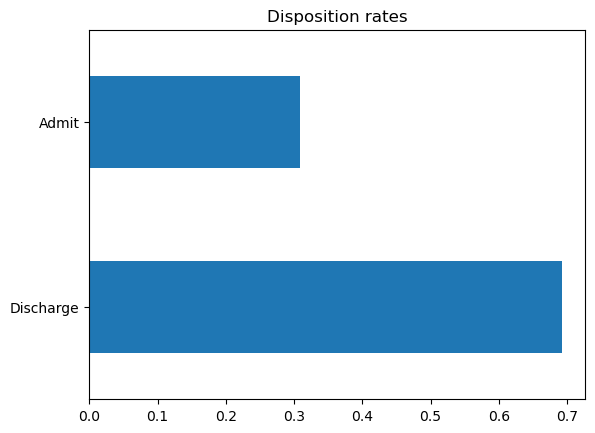

In [72]:
# See the distribution of the target
cleaned_df['disposition'].value_counts(normalize=True).plot(kind="barh")
plt.title("Disposition rates")
plt.show()

We see 70% no and ~30% yes, which is a imbalance in the data - we need to keep this in mind for when we evaluate the predictive models later.

In [73]:
# Create a new column that encodes 'disposition' column as binary
df_processed['disposition'] = np.where(cleaned_df['disposition'] == 'Admit', 1, 0)

In [74]:
# Sanity check
df_processed['disposition'].value_counts(normalize=True)

0    0.691951
1    0.308049
Name: disposition, dtype: float64

In [75]:
# Sanity check
df_processed.head()

,disposition
0,0
1,0
2,0
3,0
4,1


In [76]:
# Sanity check
df_processed.index

RangeIndex(start=0, stop=534730, step=1)

In [77]:
# Bookkeeping
cleaned_df.drop(columns='disposition', inplace=True)
cleaned_df.head()

,dep_name,gender,ethnicity,race,lang,religion,maritalstatus,employstatus,insurance_status,arrivalmode,...,ulcerskin,umbilcord,unclassified,urinstone,urinyorgca,uteruscancr,uti,varicosevn,viralinfect,whtblooddx
0,B,Male,Hispanic or Latino,White or Caucasian,English,None,Single,Full Time,Other,Walk-in,...,0,0,0,0,0,0,0,0,0,0
1,B,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,Commercial,Car,...,0,0,0,0,0,0,0,0,1,0
2,B,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,Commercial,Walk-in,...,0,0,0,0,0,0,0,0,1,0
3,A,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,Commercial,Car,...,0,0,0,0,0,0,0,0,1,0
4,A,Female,Hispanic or Latino,Other,Other,Pentecostal,Widowed,Retired,Medicare,Walk-in,...,0,0,0,0,0,0,0,0,0,0


### dep_name column:  

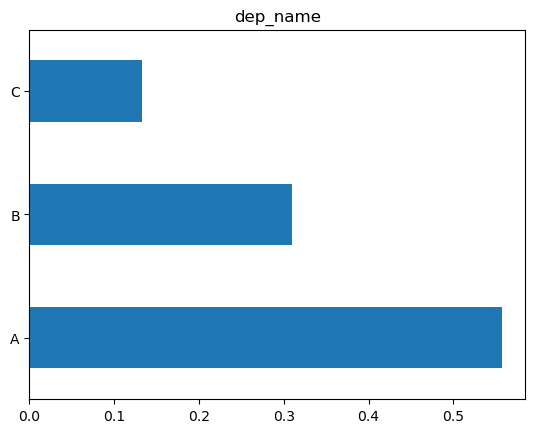

In [78]:
# Visualize the distribution of the data in that column
cleaned_df['dep_name'].value_counts(normalize=True).plot(kind="barh")
plt.title('dep_name')
plt.show()

In [79]:
pd.crosstab(cleaned_df['dep_name'], df['disposition'], normalize=True) 

disposition,Admit,Discharge
dep_name,,
A,0.164322,0.392806
B,0.092621,0.216977
C,0.039680,0.093595


In [80]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate the OneHotEncoder
ohe = OneHotEncoder()

# 2D array required so store as dataframe
dep_name = pd.DataFrame(cleaned_df['dep_name'])

# Fit the OneHotEncoder to the 'dep_name' column and transform
encoded = ohe.fit_transform(dep_name)

# interpret
encoded

<534730x3 sparse matrix of type '<class 'numpy.float64'>'
	with 534730 stored elements in Compressed Sparse Row format>

In [81]:
# Convert from sparse matrix to dense
dense_array = encoded.todense()
dense_array

matrix([[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        ...,
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]])

In [82]:
# View the classes stored in encoder
ohe.categories_

[array(['A', 'B', 'C'], dtype=object)]

In [83]:
# Put into a dataframe to get column names
dep_name_df = pd.DataFrame(dense_array, columns=ohe.categories_[0], dtype=int)

# Show
dep_name_df.head()

,A,B,C
0,0,1,0
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0


In [84]:
dep_name_df.isna().sum()

A    0
B    0
C    0
dtype: int64

In [85]:
dep_name_df.tail()

,A,B,C
534725,1,0,0
534726,1,0,0
534727,1,0,0
534728,1,0,0
534729,1,0,0


In [86]:
len(dep_name_df)

534730

In [87]:
len(df_processed)

534730

In [88]:
df_processed.tail()

,disposition
534725,1
534726,1
534727,0
534728,1
534729,1


In [89]:
# rename columns with prefix "dep_"
dep_name_df = dep_name_df.rename(columns={'A': 'dep_A', 'B': 'dep_B', 'C': 'dep_C'})

In [90]:
# Concatenate the dep_name_df to the df_processed
df_processed = pd.concat([df_processed, dep_name_df], axis=1)
df_processed.head()

,disposition,dep_A,dep_B,dep_C
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,1,1,0,0


In [91]:
df_processed.isna().sum()

disposition    0
dep_A          0
dep_B          0
dep_C          0
dtype: int64

In [92]:
# Bookkeeping
cleaned_df.drop(columns=['dep_name'], inplace=True)

In [93]:
# Sanity check
cleaned_df.head()

,gender,ethnicity,race,lang,religion,maritalstatus,employstatus,insurance_status,arrivalmode,arrivalmonth,...,ulcerskin,umbilcord,unclassified,urinstone,urinyorgca,uteruscancr,uti,varicosevn,viralinfect,whtblooddx
0,Male,Hispanic or Latino,White or Caucasian,English,None,Single,Full Time,Other,Walk-in,June,...,0,0,0,0,0,0,0,0,0,0
1,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,Commercial,Car,January,...,0,0,0,0,0,0,0,0,1,0
2,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,Commercial,Walk-in,July,...,0,0,0,0,0,0,0,0,1,0
3,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,Commercial,Car,July,...,0,0,0,0,0,0,0,0,1,0
4,Female,Hispanic or Latino,Other,Other,Pentecostal,Widowed,Retired,Medicare,Walk-in,November,...,0,0,0,0,0,0,0,0,0,0


### gender column:

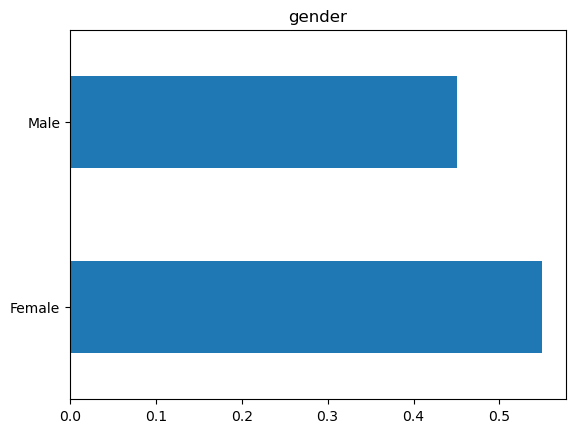

In [94]:
# Visualize the distribution of the data in that column
cleaned_df['gender'].value_counts(normalize=True).plot(kind="barh")
plt.title('gender')
plt.show()

In [95]:

pd.crosstab(cleaned_df['gender'], df['disposition'], normalize=True) 


disposition,Admit,Discharge
gender,,
Female,0.164184,0.385714
Male,0.132439,0.317663


In [96]:
# Instantiate the OneHotEncoder
ohe = OneHotEncoder()

# 2D array required so store as dataframe
gender = pd.DataFrame(cleaned_df['gender'])

# Fit the OneHotEncoder to the 'Country_Hotel' column and transform
encoded = ohe.fit_transform(gender)

# interpret
encoded

<534730x2 sparse matrix of type '<class 'numpy.float64'>'
	with 534730 stored elements in Compressed Sparse Row format>

In [97]:
# Convert from sparse matrix to dense
dense_array = encoded.todense()
dense_array

matrix([[0., 1.],
        [0., 1.],
        [0., 1.],
        ...,
        [0., 1.],
        [0., 1.],
        [0., 1.]])

In [98]:
# View the classes stored in encoder
ohe.categories_

[array(['Female', 'Male'], dtype=object)]

In [99]:
# Put into a dataframe to get column names
dep_name_df = pd.DataFrame(dense_array, columns=ohe.categories_[0], dtype=int)

# Show
dep_name_df.head()

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0


In [100]:
# Concatenate the dep_name_df to the df_processed
df_processed = pd.concat([df_processed, dep_name_df], axis=1)
df_processed.head()

,disposition,dep_A,dep_B,dep_C,Female,Male
0,0,0,1,0,0,1
1,0,0,1,0,0,1
2,0,0,1,0,0,1
3,0,1,0,0,0,1
4,1,1,0,0,1,0


In [101]:
# Bookkeeping
cleaned_df.drop(columns=['gender'], inplace=True)

In [102]:
# Sanity check
cleaned_df.head()

,ethnicity,race,lang,religion,maritalstatus,employstatus,insurance_status,arrivalmode,arrivalmonth,arrivalday,...,ulcerskin,umbilcord,unclassified,urinstone,urinyorgca,uteruscancr,uti,varicosevn,viralinfect,whtblooddx
0,Hispanic or Latino,White or Caucasian,English,None,Single,Full Time,Other,Walk-in,June,Tuesday,...,0,0,0,0,0,0,0,0,0,0
1,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,Commercial,Car,January,Tuesday,...,0,0,0,0,0,0,0,0,1,0
2,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,Commercial,Walk-in,July,Thursday,...,0,0,0,0,0,0,0,0,1,0
3,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,Commercial,Car,July,Saturday,...,0,0,0,0,0,0,0,0,1,0
4,Hispanic or Latino,Other,Other,Pentecostal,Widowed,Retired,Medicare,Walk-in,November,Tuesday,...,0,0,0,0,0,0,0,0,0,0


### ethnicity column:

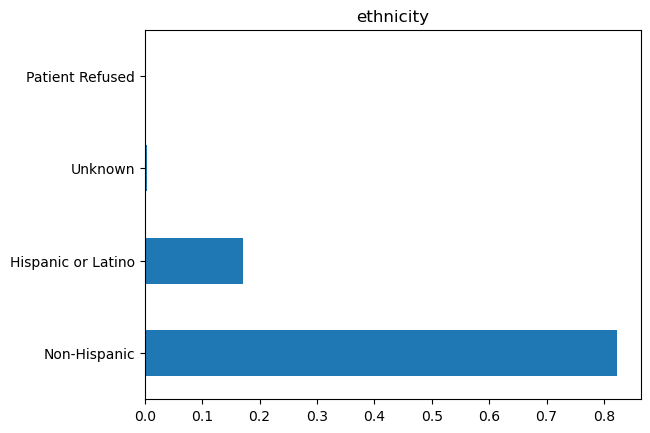

In [103]:
# Visualize the distribution of the data in that column
cleaned_df['ethnicity'].value_counts(normalize=True).plot(kind="barh")
plt.title('ethnicity')
plt.show() 

In [104]:
# Crosstab
pd.crosstab(cleaned_df['ethnicity'], df['disposition'], normalize=True) 

disposition,Admit,Discharge
ethnicity,,
Hispanic or Latino,0.050179,0.120212
Non-Hispanic,0.244550,0.578662
Patient Refused,0.000673,0.001535
Unknown,0.001221,0.002968


First, by my expert knowledge ethnicity is not something that could impact in the emergency status of a patient. Second, more than 80% of patients had the same ethnicity and almost all the admited patients are in this category, then this column is not a really useful column. 

In [105]:
# Bookkeeping
cleaned_df.drop(columns=['ethnicity'], inplace=True)

### race column:

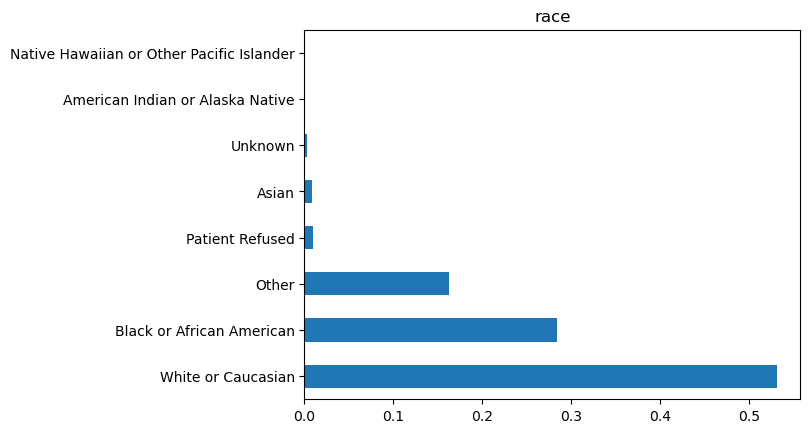

In [106]:
# Visualize the distribution of the data in that column
cleaned_df['race'].value_counts(normalize=True).plot(kind="barh")
plt.title('race')
plt.show() 

In [107]:
# Crosstab
pd.crosstab(cleaned_df['race'], df['disposition'], normalize=True) 


disposition,Admit,Discharge
race,,
American Indian or Alaska Native,0.000275,0.000641
Asian,0.002500,0.006100
Black or African American,0.084678,0.199063
Native Hawaiian or Other Pacific Islander,0.000172,0.000492
Other,0.047226,0.115296
Patient Refused,0.002809,0.006411
Unknown,0.000785,0.002130
White or Caucasian,0.158177,0.373244


Same as ethinicity column. Race is not a useful column.

In [108]:
# Bookkeeping
cleaned_df.drop(columns=['race'], inplace=True)

### lang column:

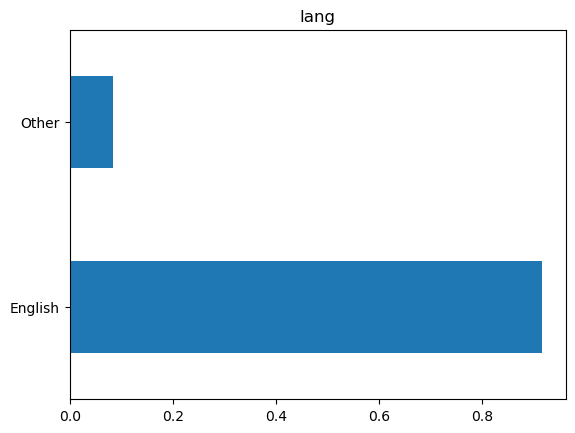

In [109]:
# Visualize the distribution of the data in that column
cleaned_df['lang'].value_counts(normalize=True).plot(kind="barh")
plt.title('lang')
plt.show() 

In [110]:
# Crosstab
pd.crosstab(cleaned_df['lang'], df['disposition'], normalize=True) 

disposition,Admit,Discharge
lang,,
English,0.272365,0.643671
Other,0.024257,0.059707


Lang is not a useful column.

In [111]:
# Bookkeeping
cleaned_df.drop(columns=['lang'], inplace=True)

### religion column: 

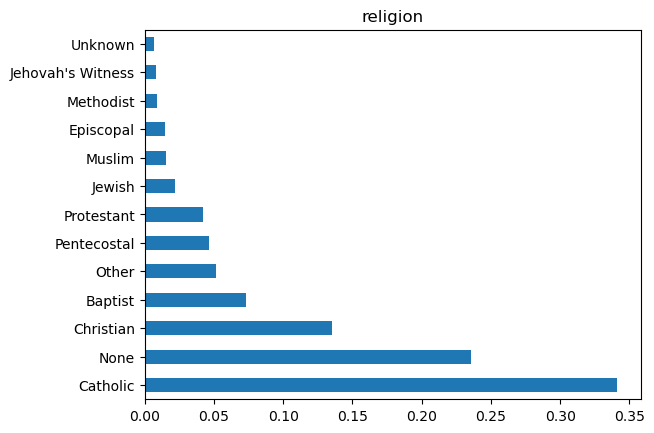

In [112]:
# Visualize the distribution of the data in that column
cleaned_df['religion'].value_counts(normalize=True).plot(kind="barh")
plt.title('religion')
plt.show() 

In [113]:
# Crosstab
pd.crosstab(cleaned_df['religion'], df['disposition'], normalize=True) 

disposition,Admit,Discharge
religion,,
Baptist,0.021746,0.051359
Catholic,0.101956,0.239291
Christian,0.040495,0.094919
Episcopal,0.004004,0.010265
Jehovah's Witness,0.002392,0.005627
Jewish,0.006413,0.015069
Methodist,0.002626,0.006057
Muslim,0.004312,0.010949
None,0.068870,0.166933


Religion is not a useful column.

In [114]:
# Bookkeeping
cleaned_df.drop(columns=['religion'], inplace=True)

### Marital status column:

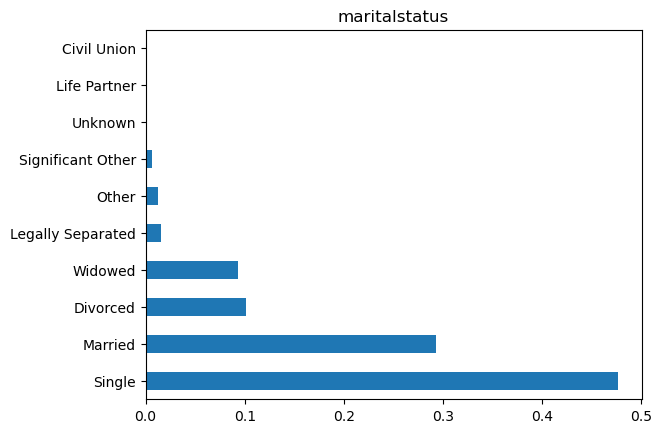

In [115]:
# Visualize the distribution
cleaned_df['maritalstatus'].value_counts(normalize=True).plot(kind="barh")
plt.title('maritalstatus')
plt.show()

80% of the data are represented by single and married.

In [116]:
# Crosstab
pd.crosstab(cleaned_df['maritalstatus'], df['disposition'], normalize=True) 

disposition,Admit,Discharge
maritalstatus,,
Civil Union,0.000123,0.000286
Divorced,0.030054,0.070998
Legally Separated,0.004617,0.011241
Life Partner,0.000181,0.000516
Married,0.086907,0.205459
Other,0.003604,0.008672
Significant Other,0.001921,0.004615
Single,0.141000,0.335311
Unknown,0.000395,0.001053


In [117]:
pd.crosstab(cleaned_df['maritalstatus'], df['disposition'])['Admit'] / pd.crosstab(cleaned_df['maritalstatus'], df['disposition']).sum(axis=1)


maritalstatus
Civil Union          0.301370
Divorced             0.297413
Legally Separated    0.291156
Life Partner         0.260054
Married              0.297255
Other                0.293571
Significant Other    0.293848
Single               0.296025
Unknown              0.272610
Widowed              0.298991
dtype: float64

In [118]:
# Instantiate the OneHotEncoder
ohe = OneHotEncoder()

# 2D array required so store as dataframe
maritalstatus = pd.DataFrame(cleaned_df['maritalstatus'])

# Fit the OneHotEncoder to the 'maritalstatus' column and transform
encoded = ohe.fit_transform(maritalstatus)

# interpret
encoded

<534730x10 sparse matrix of type '<class 'numpy.float64'>'
	with 534730 stored elements in Compressed Sparse Row format>

In [119]:
# Convert from sparse matrix to dense
dense_array = encoded.todense()
dense_array

matrix([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.]])

In [120]:
# View the classes stored in encoder
ohe.categories_

[array(['Civil Union', 'Divorced', 'Legally Separated', 'Life Partner',
        'Married', 'Other', 'Significant Other', 'Single', 'Unknown',
        'Widowed'], dtype=object)]

In [121]:
# Put into a dataframe to get column names
maritalstatus_df = pd.DataFrame(dense_array, columns=ohe.categories_[0], dtype=int)

# Show
maritalstatus_df.head()

,Civil Union,Divorced,Legally Separated,Life Partner,Married,Other,Significant Other,Single,Unknown,Widowed
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1


In [122]:
# Drop the innecessary columns 
maritalstatus_df = maritalstatus_df.drop(columns=['Civil Union', 'Life Partner', 'Unknown', 'Significant Other', 'Other', 'Legally Separated'])


In [123]:
# Concatenate the dep_name_df to the df_processed
df_processed = pd.concat([df_processed, maritalstatus_df], axis=1)
df_processed.head()

,disposition,dep_A,dep_B,dep_C,Female,Male,Divorced,Married,Single,Widowed
0,0,0,1,0,0,1,0,0,1,0
1,0,0,1,0,0,1,0,1,0,0
2,0,0,1,0,0,1,0,1,0,0
3,0,1,0,0,0,1,0,1,0,0
4,1,1,0,0,1,0,0,0,0,1


In [124]:
# Bookkeeping
cleaned_df.drop(columns=['maritalstatus'], inplace=True)

In [125]:
# Sanity check
cleaned_df.head()

,employstatus,insurance_status,arrivalmode,arrivalmonth,arrivalday,arrivalhour_bin,previousdispo,esi,age,n_edvisits,...,ulcerskin,umbilcord,unclassified,urinstone,urinyorgca,uteruscancr,uti,varicosevn,viralinfect,whtblooddx
0,Full Time,Other,Walk-in,June,Tuesday,23-02,No previous dispo,4.0,40.0,0,...,0,0,0,0,0,0,0,0,0,0
1,Not Employed,Commercial,Car,January,Tuesday,15-18,No previous dispo,4.0,66.0,0,...,0,0,0,0,0,0,0,0,1,0
2,Not Employed,Commercial,Walk-in,July,Thursday,11-14,Discharge,2.0,66.0,1,...,0,0,0,0,0,0,0,0,1,0
3,Not Employed,Commercial,Car,July,Saturday,11-14,Discharge,2.0,66.0,2,...,0,0,0,0,0,0,0,0,1,0
4,Retired,Medicare,Walk-in,November,Tuesday,07-10,Discharge,3.0,84.0,1,...,0,0,0,0,0,0,0,0,0,0


### employ status column:

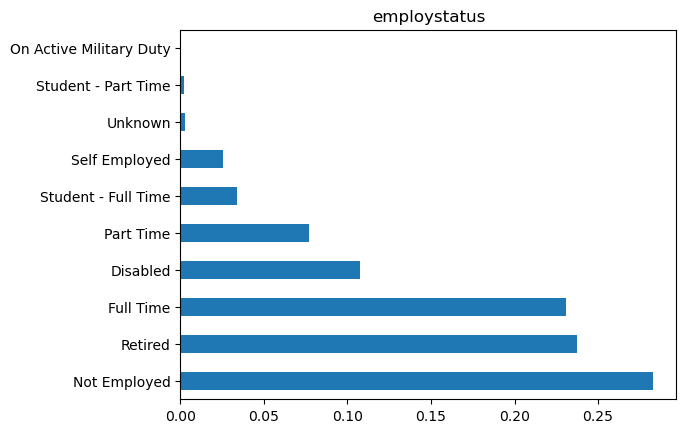

In [126]:
# Visualize the distribution of the data in that column
cleaned_df['employstatus'].value_counts(normalize=True).plot(kind="barh")
plt.title('employstatus')
plt.show() 

In [127]:
# Crosstab
pd.crosstab(cleaned_df['employstatus'], df['disposition'], normalize=True) 

disposition,Admit,Discharge
employstatus,,
Disabled,0.032227,0.075518
Full Time,0.068122,0.162845
Not Employed,0.083145,0.199680
On Active Military Duty,0.000110,0.000368
Part Time,0.023137,0.053537
Retired,0.071090,0.166288
Self Employed,0.007450,0.017723
Student - Full Time,0.009835,0.024143
Student - Part Time,0.000617,0.001438


In [128]:
# Instantiate the OneHotEncoder
ohe = OneHotEncoder()

# 2D array required so store as dataframe
employstatus = pd.DataFrame(cleaned_df['employstatus'])

# Fit the OneHotEncoder to the 'employstatus' column and transform
encoded = ohe.fit_transform(employstatus)

# interpret
encoded

<534730x10 sparse matrix of type '<class 'numpy.float64'>'
	with 534730 stored elements in Compressed Sparse Row format>

In [129]:
# Convert from sparse matrix to dense
dense_array = encoded.todense()
dense_array

matrix([[0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]])

In [130]:
# View the classes stored in encoder
ohe.categories_

[array(['Disabled', 'Full Time', 'Not Employed', 'On Active Military Duty',
        'Part Time', 'Retired', 'Self Employed', 'Student - Full Time',
        'Student - Part Time', 'Unknown'], dtype=object)]

In [131]:
# Put into a dataframe to get column names
employstatus_df = pd.DataFrame(dense_array, columns=ohe.categories_[0], dtype=int)

# Show
employstatus_df.head()

,Disabled,Full Time,Not Employed,On Active Military Duty,Part Time,Retired,Self Employed,Student - Full Time,Student - Part Time,Unknown
0,0,1,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0


In [132]:
# Drop the innecessary columns 
employstatus_df = employstatus_df.drop(columns=['Disabled', 'On Active Military Duty', 'Part Time', 'Retired', 'Self Employed', 'Student - Full Time', 'Student - Part Time', 'Unknown'])


In [133]:
# Concatenate the dep_name_df to the df_processed
df_processed = pd.concat([df_processed, employstatus_df], axis=1)
df_processed.head()

,disposition,dep_A,dep_B,dep_C,Female,Male,Divorced,Married,Single,Widowed,Full Time,Not Employed
0,0,0,1,0,0,1,0,0,1,0,1,0
1,0,0,1,0,0,1,0,1,0,0,0,1
2,0,0,1,0,0,1,0,1,0,0,0,1
3,0,1,0,0,0,1,0,1,0,0,0,1
4,1,1,0,0,1,0,0,0,0,1,0,0


In [134]:
# Bookkeeping
cleaned_df.drop(columns=['employstatus'], inplace=True)

In [135]:
# Sanity check
cleaned_df.head()

,insurance_status,arrivalmode,arrivalmonth,arrivalday,arrivalhour_bin,previousdispo,esi,age,n_edvisits,n_admissions,...,ulcerskin,umbilcord,unclassified,urinstone,urinyorgca,uteruscancr,uti,varicosevn,viralinfect,whtblooddx
0,Other,Walk-in,June,Tuesday,23-02,No previous dispo,4.0,40.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Commercial,Car,January,Tuesday,15-18,No previous dispo,4.0,66.0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,Commercial,Walk-in,July,Thursday,11-14,Discharge,2.0,66.0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,Commercial,Car,July,Saturday,11-14,Discharge,2.0,66.0,2,0,...,0,0,0,0,0,0,0,0,1,0
4,Medicare,Walk-in,November,Tuesday,07-10,Discharge,3.0,84.0,1,0,...,0,0,0,0,0,0,0,0,0,0


### insurance status column:

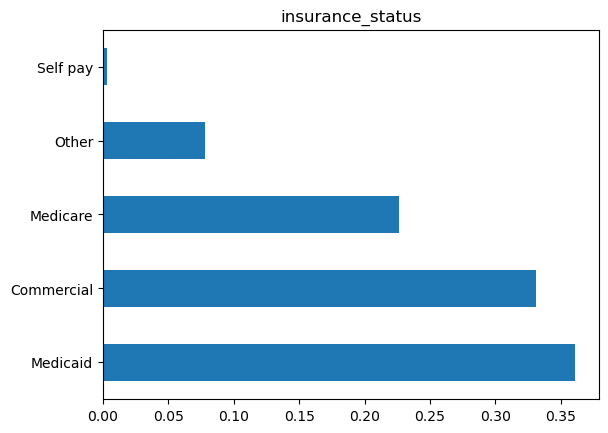

In [136]:
# Visualize the distribution of the data in that column
cleaned_df['insurance_status'].value_counts(normalize=True).plot(kind="barh")
plt.title('insurance_status')
plt.show() 


In [137]:
# Crosstab
pd.crosstab(cleaned_df['insurance_status'], df['disposition'], normalize=True) 

disposition,Admit,Discharge
insurance_status,,
Commercial,0.098453,0.232979
Medicaid,0.107370,0.253782
Medicare,0.067578,0.158916
Other,0.022322,0.055424
Self pay,0.000900,0.002276


In [138]:
# Instantiate the OneHotEncoder
ohe = OneHotEncoder()

# 2D array required so store as dataframe
insurance_status = pd.DataFrame(cleaned_df['insurance_status'])

# Fit the OneHotEncoder to the 'insurance_status' column and transform
encoded = ohe.fit_transform(insurance_status)

# interpret
encoded

<534730x5 sparse matrix of type '<class 'numpy.float64'>'
	with 534730 stored elements in Compressed Sparse Row format>

In [139]:
# Convert from sparse matrix to dense
dense_array = encoded.todense()
dense_array

matrix([[0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        ...,
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.]])

In [140]:
# View the classes stored in encoder
ohe.categories_

[array(['Commercial', 'Medicaid', 'Medicare', 'Other', 'Self pay'],
       dtype=object)]

In [141]:
# Put into a dataframe to get column names
insurance_status_df = pd.DataFrame(dense_array, columns=ohe.categories_[0], dtype=int)

# Show
insurance_status_df.head()

,Commercial,Medicaid,Medicare,Other,Self pay
0,0,0,0,1,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,0,1,0,0


In [142]:
# Drop the innecessary columns 
insurance_status_df = insurance_status_df.drop(columns=['Other','Self pay'])


In [143]:
# Concatenate the dep_name_df to the df_processed
df_processed = pd.concat([df_processed, insurance_status_df], axis=1)
df_processed.head()

,disposition,dep_A,dep_B,dep_C,Female,Male,Divorced,Married,Single,Widowed,Full Time,Not Employed,Commercial,Medicaid,Medicare
0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0
1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0
2,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0
3,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0
4,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1


In [144]:
# Bookkeeping
cleaned_df.drop(columns=['insurance_status'], inplace=True)

In [145]:
# Sanity check
cleaned_df.head()

,arrivalmode,arrivalmonth,arrivalday,arrivalhour_bin,previousdispo,esi,age,n_edvisits,n_admissions,n_surgeries,...,ulcerskin,umbilcord,unclassified,urinstone,urinyorgca,uteruscancr,uti,varicosevn,viralinfect,whtblooddx
0,Walk-in,June,Tuesday,23-02,No previous dispo,4.0,40.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Car,January,Tuesday,15-18,No previous dispo,4.0,66.0,0,0,2,...,0,0,0,0,0,0,0,0,1,0
2,Walk-in,July,Thursday,11-14,Discharge,2.0,66.0,1,0,2,...,0,0,0,0,0,0,0,0,1,0
3,Car,July,Saturday,11-14,Discharge,2.0,66.0,2,0,2,...,0,0,0,0,0,0,0,0,1,0
4,Walk-in,November,Tuesday,07-10,Discharge,3.0,84.0,1,0,5,...,0,0,0,0,0,0,0,0,0,0


### arrivalmode column:

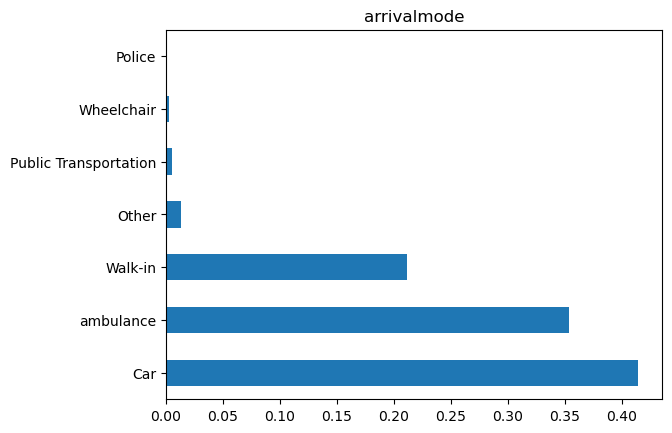

In [146]:
# Visualize the distribution of the data in that column
cleaned_df['arrivalmode'].value_counts(normalize=True).plot(kind="barh")
plt.title('arrivalmode')
plt.show() 

In [147]:
# Crosstab
pd.crosstab(cleaned_df['arrivalmode'], df['disposition'], normalize=True) 

disposition,Admit,Discharge
arrivalmode,,
Car,0.123275,0.291154
Other,0.003684,0.009072
Police,0.000064,0.000122
Public Transportation,0.001593,0.003647
Walk-in,0.062847,0.148561
Wheelchair,0.000870,0.002066
ambulance,0.104290,0.248755


In [148]:
# Instantiate the OneHotEncoder
ohe = OneHotEncoder()

# 2D array required so store as dataframe
arrivalmode = pd.DataFrame(cleaned_df['arrivalmode'])

# Fit the OneHotEncoder to the 'arrivalmode' column and transform
encoded = ohe.fit_transform(arrivalmode)

# interpret
encoded

<534730x7 sparse matrix of type '<class 'numpy.float64'>'
	with 534730 stored elements in Compressed Sparse Row format>

In [149]:
# Convert from sparse matrix to dense
dense_array = encoded.todense()
dense_array

matrix([[0., 0., 0., ..., 1., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]])

In [150]:
# View the classes stored in encoder
ohe.categories_

[array(['Car', 'Other', 'Police', 'Public Transportation', 'Walk-in',
        'Wheelchair', 'ambulance'], dtype=object)]

In [151]:
# Put into a dataframe to get column names
arrivalmode_df = pd.DataFrame(dense_array, columns=ohe.categories_[0], dtype=int)

# Show
arrivalmode_df.head()

,Car,Other,Police,Public Transportation,Walk-in,Wheelchair,ambulance
0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0
2,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0


In [152]:
# Drop the unnecessary columns 
arrivalmode_df = arrivalmode_df.drop(columns=['Other' ,'Police', 'Public Transportation', 'Wheelchair'])


In [153]:
# Concatenate the dep_name_df to the df_processed
df_processed = pd.concat([df_processed, arrivalmode_df], axis=1)
df_processed.head()

,disposition,dep_A,dep_B,dep_C,Female,Male,Divorced,Married,Single,Widowed,Full Time,Not Employed,Commercial,Medicaid,Medicare,Car,Walk-in,ambulance
0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0
1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0
2,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0
3,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0


In [154]:
# Bookkeeping
cleaned_df.drop(columns=['arrivalmode'], inplace=True)

In [155]:
# Sanity check
cleaned_df.head()

,arrivalmonth,arrivalday,arrivalhour_bin,previousdispo,esi,age,n_edvisits,n_admissions,n_surgeries,cc_abdominalcramping,...,ulcerskin,umbilcord,unclassified,urinstone,urinyorgca,uteruscancr,uti,varicosevn,viralinfect,whtblooddx
0,June,Tuesday,23-02,No previous dispo,4.0,40.0,0,0,1,0.0,...,0,0,0,0,0,0,0,0,0,0
1,January,Tuesday,15-18,No previous dispo,4.0,66.0,0,0,2,0.0,...,0,0,0,0,0,0,0,0,1,0
2,July,Thursday,11-14,Discharge,2.0,66.0,1,0,2,0.0,...,0,0,0,0,0,0,0,0,1,0
3,July,Saturday,11-14,Discharge,2.0,66.0,2,0,2,0.0,...,0,0,0,0,0,0,0,0,1,0
4,November,Tuesday,07-10,Discharge,3.0,84.0,1,0,5,0.0,...,0,0,0,0,0,0,0,0,0,0


### arrival month column:

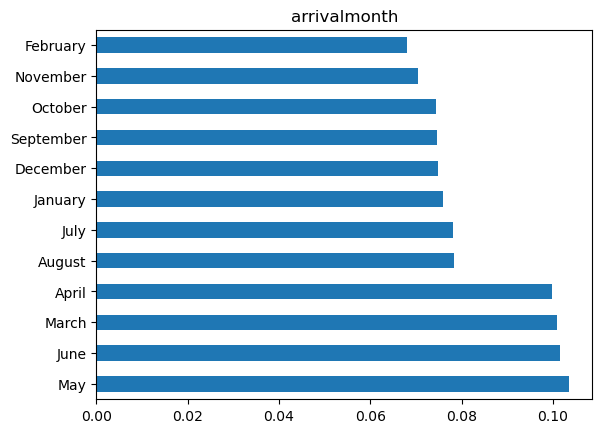

In [156]:
# Visualize the distribution of the data in that column
cleaned_df['arrivalmonth'].value_counts(normalize=True).plot(kind="barh")
plt.title('arrivalmonth')
plt.show()

In [157]:
# Crosstab
pd.crosstab(cleaned_df['arrivalmonth'], df['disposition'], normalize=True) 

disposition,Admit,Discharge
arrivalmonth,,
April,0.029697,0.070078
August,0.023200,0.055142
December,0.022327,0.052499
February,0.020285,0.047826
January,0.022353,0.053565
July,0.023038,0.055005
June,0.029974,0.071466
March,0.030038,0.070780
May,0.030389,0.073065


In [158]:
# Instantiate the OneHotEncoder
ohe = OneHotEncoder()

# 2D array required so store as dataframe
arrivalmonth = pd.DataFrame(cleaned_df['arrivalmonth'])

# Fit the OneHotEncoder to the 'arrivalmonth' column and transform
encoded = ohe.fit_transform(arrivalmonth)

# interpret
encoded

<534730x12 sparse matrix of type '<class 'numpy.float64'>'
	with 534730 stored elements in Compressed Sparse Row format>

In [159]:
# Convert from sparse matrix to dense
dense_array = encoded.todense()
dense_array

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [160]:
# View the classes stored in encoder
ohe.categories_

[array(['April', 'August', 'December', 'February', 'January', 'July',
        'June', 'March', 'May', 'November', 'October', 'September'],
       dtype=object)]

In [161]:
# Put into a dataframe to get column names
arrivalmonth_df = pd.DataFrame(dense_array, columns=ohe.categories_[0], dtype=int)

# Show
arrivalmonth_df.head()

,April,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0


In [162]:
# Concatenate the dep_name_df to the df_processed
df_processed = pd.concat([df_processed, arrivalmonth_df], axis=1)
df_processed.head()

,disposition,dep_A,dep_B,dep_C,Female,Male,Divorced,Married,Single,Widowed,...,December,February,January,July,June,March,May,November,October,September
0,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [163]:
# Bookkeeping
cleaned_df.drop(columns=['arrivalmonth'], inplace=True)

In [164]:
# Sanity check
cleaned_df.head()

,arrivalday,arrivalhour_bin,previousdispo,esi,age,n_edvisits,n_admissions,n_surgeries,cc_abdominalcramping,cc_abdominaldistention,...,ulcerskin,umbilcord,unclassified,urinstone,urinyorgca,uteruscancr,uti,varicosevn,viralinfect,whtblooddx
0,Tuesday,23-02,No previous dispo,4.0,40.0,0,0,1,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,Tuesday,15-18,No previous dispo,4.0,66.0,0,0,2,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,Thursday,11-14,Discharge,2.0,66.0,1,0,2,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,Saturday,11-14,Discharge,2.0,66.0,2,0,2,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,Tuesday,07-10,Discharge,3.0,84.0,1,0,5,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


### arrivalday column:

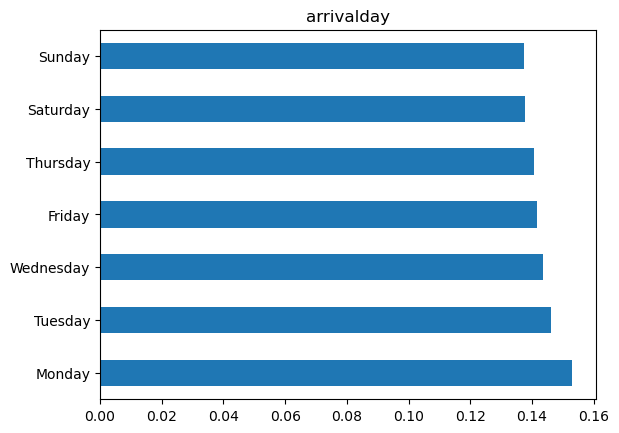

In [165]:
# Visualize the distribution of the data in that column
cleaned_df['arrivalday'].value_counts(normalize=True).plot(kind="barh")
plt.title('arrivalday')
plt.show() 

In [166]:
# Crosstab
pd.crosstab(cleaned_df['arrivalday'], df['disposition'], normalize=True) 

disposition,Admit,Discharge
arrivalday,,
Friday,0.042158,0.099310
Monday,0.045296,0.107834
Saturday,0.040910,0.096671
Sunday,0.040527,0.096954
Thursday,0.041520,0.099072
Tuesday,0.043356,0.102680
Wednesday,0.042855,0.100857


In [167]:
# Instantiate the OneHotEncoder
ohe = OneHotEncoder()

# 2D array required so store as dataframe
arrivalday = pd.DataFrame(cleaned_df['arrivalday'])

# Fit the OneHotEncoder to the 'arrivalday' column and transform
encoded = ohe.fit_transform(arrivalday)

# interpret
encoded

<534730x7 sparse matrix of type '<class 'numpy.float64'>'
	with 534730 stored elements in Compressed Sparse Row format>

In [168]:
# Convert from sparse matrix to dense
dense_array = encoded.todense()
dense_array

matrix([[0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.]])

In [169]:
# View the classes stored in encoder
ohe.categories_

[array(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
        'Wednesday'], dtype=object)]

In [170]:
# Put into a dataframe to get column names
arrivalday_df = pd.DataFrame(dense_array, columns=ohe.categories_[0], dtype=int)

# Show
arrivalday_df.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0


In [171]:
# Concatenate the dep_name_df to the df_processed
df_processed = pd.concat([df_processed, arrivalday_df], axis=1)
df_processed.head()

,disposition,dep_A,dep_B,dep_C,Female,Male,Divorced,Married,Single,Widowed,...,November,October,September,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,1,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0


In [172]:
# Bookkeeping
cleaned_df.drop(columns=['arrivalday'], inplace=True)

In [173]:
# Sanity check
cleaned_df.head()

,arrivalhour_bin,previousdispo,esi,age,n_edvisits,n_admissions,n_surgeries,cc_abdominalcramping,cc_abdominaldistention,cc_abdominalpain,...,ulcerskin,umbilcord,unclassified,urinstone,urinyorgca,uteruscancr,uti,varicosevn,viralinfect,whtblooddx
0,23-02,No previous dispo,4.0,40.0,0,0,1,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,15-18,No previous dispo,4.0,66.0,0,0,2,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,11-14,Discharge,2.0,66.0,1,0,2,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,11-14,Discharge,2.0,66.0,2,0,2,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,07-10,Discharge,3.0,84.0,1,0,5,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


### arrivalhour_bin column:

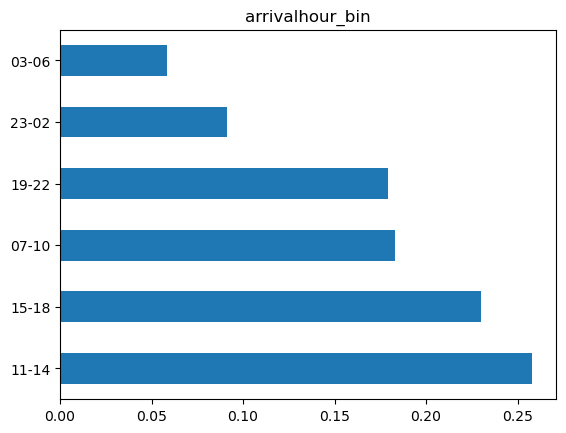

In [174]:
# Visualize the distribution of the data in that column
cleaned_df['arrivalhour_bin'].value_counts(normalize=True).plot(kind="barh")
plt.title('arrivalhour_bin')
plt.show()

In [175]:
# Crosstab
pd.crosstab(cleaned_df['arrivalhour_bin'], df['disposition'], normalize=True) 

disposition,Admit,Discharge
arrivalhour_bin,,
03-06,0.017362,0.041013
07-10,0.054295,0.128844
11-14,0.076534,0.181589
15-18,0.068885,0.161231
19-22,0.052660,0.126555
23-02,0.026886,0.064145


In [176]:
# Instantiate the OneHotEncoder
ohe = OneHotEncoder()

# 2D array required so store as dataframe
arrivalhour_bin = pd.DataFrame(cleaned_df['arrivalhour_bin'])

# Fit the OneHotEncoder to the 'arrivalhour_bin' column and transform
encoded = ohe.fit_transform(arrivalhour_bin)

# interpret
encoded

<534730x6 sparse matrix of type '<class 'numpy.float64'>'
	with 534730 stored elements in Compressed Sparse Row format>

In [177]:
# Convert from sparse matrix to dense
dense_array = encoded.todense()
dense_array

matrix([[0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        ...,
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1., 0.]])

In [178]:
# View the classes stored in encoder
ohe.categories_

[array(['03-06', '07-10', '11-14', '15-18', '19-22', '23-02'], dtype=object)]

In [179]:
# Put into a dataframe to get column names
arrivalhour_bin_df = pd.DataFrame(dense_array, columns=ohe.categories_[0], dtype=int)

# Show
arrivalhour_bin_df.head()

,03-06,07-10,11-14,15-18,19-22,23-02
0,0,0,0,0,0,1
1,0,0,0,1,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,1,0,0,0,0


In [180]:
# Concatenate the dep_name_df to the df_processed
df_processed = pd.concat([df_processed, arrivalhour_bin_df], axis=1)
df_processed.head()

,disposition,dep_A,dep_B,dep_C,Female,Male,Divorced,Married,Single,Widowed,...,Sunday,Thursday,Tuesday,Wednesday,03-06,07-10,11-14,15-18,19-22,23-02
0,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,0,0,1,0,0,1,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
3,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,1,0,0,1,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0


In [181]:
# Bookkeeping
cleaned_df.drop(columns=['arrivalhour_bin'], inplace=True)

In [182]:
# Sanity check
cleaned_df.head()

,previousdispo,esi,age,n_edvisits,n_admissions,n_surgeries,cc_abdominalcramping,cc_abdominaldistention,cc_abdominalpain,cc_abdominalpainpregnant,...,ulcerskin,umbilcord,unclassified,urinstone,urinyorgca,uteruscancr,uti,varicosevn,viralinfect,whtblooddx
0,No previous dispo,4.0,40.0,0,0,1,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,No previous dispo,4.0,66.0,0,0,2,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,Discharge,2.0,66.0,1,0,2,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,Discharge,2.0,66.0,2,0,2,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,Discharge,3.0,84.0,1,0,5,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


 ### previousdispo column:

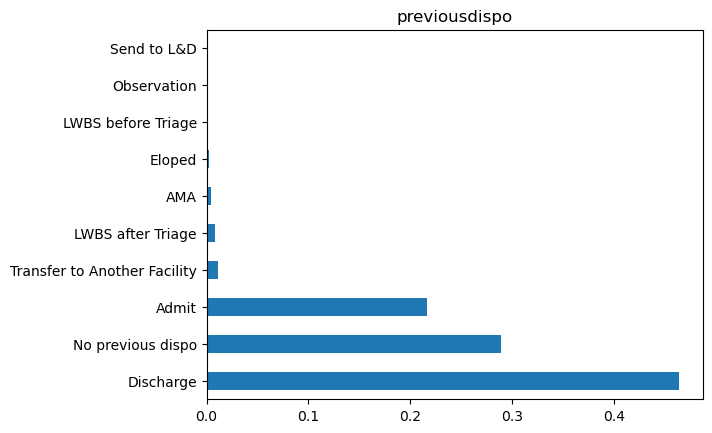

In [183]:
# Visualize the distribution of the data in that column
cleaned_df['previousdispo'].value_counts(normalize=True).plot(kind="barh")
plt.title('previousdispo')
plt.show()

In [184]:
# Crosstab
pd.crosstab(cleaned_df['previousdispo'], df['disposition'], normalize=True)

disposition,Admit,Discharge
previousdispo,,
AMA,0.001341,0.003271
Admit,0.064788,0.151778
Discharge,0.138101,0.326034
Eloped,0.000870,0.001973
LWBS after Triage,0.002515,0.006220
LWBS before Triage,0.000447,0.001012
No previous dispo,0.084854,0.204593
Observation,0.000189,0.000408
Send to L&D,0.000114,0.000267


In [185]:
# Instantiate the OneHotEncoder
ohe = OneHotEncoder()

# 2D array required so store as dataframe
previousdispo = pd.DataFrame(cleaned_df['previousdispo'])

# Fit the OneHotEncoder to the 'previousdispo' column and transform
encoded = ohe.fit_transform(previousdispo)

# interpret
encoded

<534730x10 sparse matrix of type '<class 'numpy.float64'>'
	with 534730 stored elements in Compressed Sparse Row format>

In [186]:
# Convert from sparse matrix to dense
dense_array = encoded.todense()
dense_array

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]])

In [187]:
# View the classes stored in encoder
ohe.categories_

[array(['AMA', 'Admit', 'Discharge', 'Eloped', 'LWBS after Triage',
        'LWBS before Triage', 'No previous dispo', 'Observation',
        'Send to L&D', 'Transfer to Another Facility'], dtype=object)]

In [188]:
# Put into a dataframe to get column names
previousdispo_df = pd.DataFrame(dense_array, columns=ohe.categories_[0], dtype=int)

# Show
previousdispo_df.head()

,AMA,Admit,Discharge,Eloped,LWBS after Triage,LWBS before Triage,No previous dispo,Observation,Send to L&D,Transfer to Another Facility
0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


In [189]:
# Drop the unnecessary columns 
previousdispo_df = previousdispo_df.drop(columns=['AMA','Eloped','LWBS after Triage','LWBS before Triage', 'Observation', 'Send to L&D', 'Transfer to Another Facility'])
previousdispo_df

,Admit,Discharge,No previous dispo
0,0,0,1
1,0,0,1
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
534725,1,0,0
534726,1,0,0
534727,1,0,0
534728,0,1,0


In [190]:
# rename columns with prefix "dep_"
previousdispo_df = previousdispo_df.rename(columns={'Admit': 'pv_admit', 'Discharge': 'pv_discharge', 'No previous dispo': 'pv_none'})


In [191]:
# Concatenate the dep_name_df to the df_processed
df_processed = pd.concat([df_processed, previousdispo_df], axis=1)
df_processed.head()

,disposition,dep_A,dep_B,dep_C,Female,Male,Divorced,Married,Single,Widowed,...,Wednesday,03-06,07-10,11-14,15-18,19-22,23-02,pv_admit,pv_discharge,pv_none
0,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,1,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,1,1,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [192]:
# Bookkeeping
cleaned_df.drop(columns=['previousdispo'], inplace=True)

In [193]:
# Sanity check
cleaned_df.head()

,esi,age,n_edvisits,n_admissions,n_surgeries,cc_abdominalcramping,cc_abdominaldistention,cc_abdominalpain,cc_abdominalpainpregnant,cc_abnormallab,...,ulcerskin,umbilcord,unclassified,urinstone,urinyorgca,uteruscancr,uti,varicosevn,viralinfect,whtblooddx
0,4.0,40.0,0,0,1,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,4.0,66.0,0,0,2,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,2.0,66.0,1,0,2,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,2.0,66.0,2,0,2,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,3.0,84.0,1,0,5,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


### esi column:

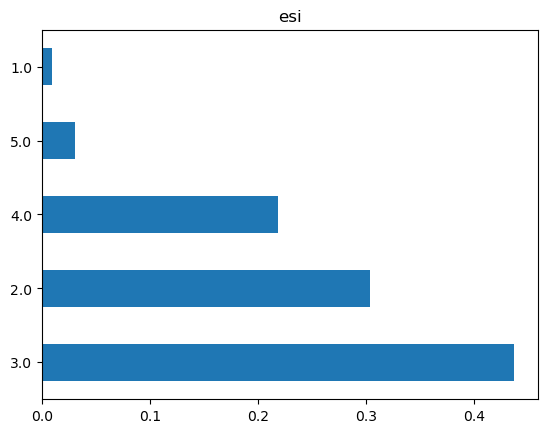

In [194]:
# Visualize the distribution of the data in that column
cleaned_df['esi'].value_counts(normalize=True).plot(kind="barh")
plt.title('esi')
plt.show()

In [195]:
# Crosstab
pd.crosstab(cleaned_df['esi'], df['disposition'], normalize=True)

disposition,Admit,Discharge
esi,,
1.0,0.002749,0.006721
2.0,0.090045,0.213424
3.0,0.130086,0.307206
4.0,0.064741,0.154203
5.0,0.009001,0.021824


In [196]:
# Instantiate the OneHotEncoder
ohe = OneHotEncoder()

# 2D array required so store as dataframe
esi = pd.DataFrame(cleaned_df['esi'])

# Fit the OneHotEncoder to the 'esi' column and transform
encoded = ohe.fit_transform(esi)

# interpret
encoded

<534730x5 sparse matrix of type '<class 'numpy.float64'>'
	with 534730 stored elements in Compressed Sparse Row format>

In [197]:
# Convert from sparse matrix to dense
dense_array = encoded.todense()
dense_array

matrix([[0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.],
        ...,
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.]])

In [198]:
# View the classes stored in encoder
ohe.categories_

[array([1.0, 2.0, 3.0, 4.0, 5.0], dtype=object)]

In [199]:
# Put into a dataframe to get column names
esi_df = pd.DataFrame(dense_array, columns=ohe.categories_[0], dtype=int)

# Show
esi_df.head()

,1.0,2.0,3.0,4.0,5.0
0,0,0,0,1,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0


In [200]:
# rename columns with prefix "esi_"
esi_df = esi_df.rename(columns={'1.0':'esi_1', '2.0': 'esi_2', '3.0': 'esi_3', '4.0': 'esi_4', '5.0':'esi_5'})
esi_df

,1.0,2.0,3.0,4.0,5.0
0,0,0,0,1,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
534725,0,1,0,0,0
534726,0,0,1,0,0
534727,0,0,1,0,0
534728,0,0,1,0,0


In [201]:
# Concatenate the dep_name_df to the df_processed
df_processed = pd.concat([df_processed, esi_df], axis=1)
df_processed.head()

,disposition,dep_A,dep_B,dep_C,Female,Male,Divorced,Married,Single,Widowed,...,19-22,23-02,pv_admit,pv_discharge,pv_none,1.0,2.0,3.0,4.0,5.0
0,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
1,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0,1,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
4,1,1,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0


In [202]:
# Bookkeeping
cleaned_df.drop(columns=['esi'], inplace=True)

In [203]:
# Sanity check
cleaned_df.head()

,age,n_edvisits,n_admissions,n_surgeries,cc_abdominalcramping,cc_abdominaldistention,cc_abdominalpain,cc_abdominalpainpregnant,cc_abnormallab,cc_abscess,...,ulcerskin,umbilcord,unclassified,urinstone,urinyorgca,uteruscancr,uti,varicosevn,viralinfect,whtblooddx
0,40.0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,66.0,0,0,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,66.0,1,0,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,66.0,2,0,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,84.0,1,0,5,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


NOW THAT ALL THE CATEGORICAL COLUMNS WERE PROCESSED, I CAN CONCATENATE THE PROCESSED_DF WITH THE COLUMNS REMAINING IN THE CLEANED_DF

In [204]:
# Unify the dataframes
df_processed = pd.concat([df_processed, cleaned_df], axis=1)


In [205]:
df_processed.head()

,disposition,dep_A,dep_B,dep_C,Female,Male,Divorced,Married,Single,Widowed,...,ulcerskin,umbilcord,unclassified,urinstone,urinyorgca,uteruscancr,uti,varicosevn,viralinfect,whtblooddx
0,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [206]:
# Sanity check
df_processed.shape

(534730, 602)

In [211]:
# Sanity check
df_processed.isna().sum().sum()

0

### NOW THE DATAFRAME IS READY, LET'S TRY A QUICK MODEL.

In [218]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534730 entries, 0 to 534729
Columns: 602 entries, disposition to whtblooddx
dtypes: float64(202), int64(400)
memory usage: 2.4 GB


In [214]:
# Define the predictor variables
X = df_processed.drop(columns=['disposition'],axis=1).copy()

# Define the target variable
y = df_processed['disposition']

In [215]:
from sklearn.model_selection import train_test_split

# Create the train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                 test_size=0.3, 
                                                 random_state=3, 
                                                 stratify=y)

In [217]:
# Logistic regression baseline model
from sklearn.linear_model import LogisticRegression

baseline_logreg = LogisticRegression(solver='lbfgs', max_iter=10000, random_state=1)
baseline_logreg.fit(X_train, y_train)
predictions_train = baseline_logreg.predict(X_train)
predictions_test = baseline_logreg.predict(X_test)
blg_train_accuracy = baseline_logreg.score(X_train, y_train)
blr_test_accuracy = baseline_logreg.score(X_test, y_test)

# Print the accuracy of the model
print(f"Baseline_logred train accuracy: {blg_train_accuracy}")
print(f"Baseline_logreg test accuracy: {blr_test_accuracy}")

/Users/ccalderon/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/ccalderon/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/ccalderon/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/ccalderon/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An er

Baseline_logred train accuracy: 0.85773861842158
Baseline_logreg test accuracy: 0.8553350912298419


### APPLY Feature Selection: the most simple model possible with the most predictive power.

- from sklearn.feature_selection import VarianceThreshold
- from scipy.stats import chi2_contingency
- from sklearn.feature_selection import SelectKBest
- from sklearn.feature_selection import f_classif
- from sklearn.linear_model import Ridge, Lasso


## Visualize the data

In [ ]:
plt.hist(df["esi"], bins=20)

plt.axvline(df["esi"].mean(), 0, 1000, label="mean", color="lightcoral")
plt.axvline(df["esi"].median(), 0, 1000, label="median", color="lightcoral", linestyle="--")

plt.title("Distribution of esi")
sns.despine()
plt.legend()
plt.show()

In [ ]:
sns.boxplot(data=df, x = "age", y="disposition")
plt.show()

### Basic Data Analysis

Now that we have a clean dataset we can begin analyzing it to begin developing some insights about the data itself. 

The key tool at this stage are visualizations. We can create useful visuals  to help us learn more about our data. In particular we want to try and cover the following points/questions:  

1. Identify variables which are useful and relevant to what we want to study. 
2. Identify trends and relationships between variables that help us answer our question(s).
3. Do the answers to the above lead to any other areas of investigation? 

It should be noted that there isn't one correct process to follow. However if you cover the above points you are in a good position to begin more detailed analysis and modeling tasks later on.


Explore metrics of interest, what is the data telling, uncover relationships and properties, visualizations

##### A couple of relevant insights that these graphs reveal are:
-
-
-
-

## Advance Data Analysis

Remember make the prior assumptions

Advance Machine learning techniques 